In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [3]:
df = pd.read_csv('Data/global-data-on-sustainable-energy (1).csv')
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [6]:
df.shape

(3649, 21)

In [7]:
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

Issue: Renewable Energy Potential Assessment 

Variabel X:

1. Electricity from fossil fuels (TWh): Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
2. Electricity from renewables (TWh):Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
3. gdp_growth: Annual GDP growth rate based on constant local currency.
4. gdp_per_capita: Gross domestic product per person.
5. Access to electricity (% of population): The percentage of population with access to electricity.
6. Access to clean fuels for cooking: The percentage of the population with primary reliance on clean fuels.
7. Density\n(P/Km2): Population density in persons per square kilometer.
8. Primary energy consumption per capita (kWh/person): Energy consumption per person in kilowatt-hours.
9. Renewable-electricity-generating-capacity-per-capita: Installed Renewable energy capacity per person

Variabel Y:

1. Entity: The name of the country or region for which the data is reported.

In [8]:
to_drop =['Renewables (% equivalent primary energy)', 
          'Financial flows to developing countries (US $)', 
          'Year', 'Electricity from nuclear (TWh)', 
          'Low-carbon electricity (% electricity)', 
          'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
          'Value_co2_emissions_kt_by_country', 
          'Land Area(Km2)', 
          'Latitude', 
          'Longitude', 
          'Renewable energy share in the total final energy consumption (%)', 
          'gdp_per_capita']

In [9]:
df.drop(columns=to_drop, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.columns

Index(['Entity', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Electricity from fossil fuels (TWh)',
       'Electricity from renewables (TWh)',
       'Primary energy consumption per capita (kWh/person)', 'gdp_growth',
       'Density'],
      dtype='object')

In [12]:
df.head()

,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person),gdp_growth,Density
3,Afghanistan,14.738506,9.50,8.09,0.31,0.63,229.96822,8.832278,60
4,Afghanistan,20.064968,10.90,7.75,0.33,0.56,204.23125,1.414118,60
5,Afghanistan,25.390894,12.20,7.51,0.34,0.59,252.06912,11.229715,60
6,Afghanistan,30.718690,13.85,7.40,0.20,0.64,304.42090,5.357403,60
7,Afghanistan,36.051010,15.30,7.25,0.20,0.75,354.27990,13.826320,60


In [13]:
New_name = {'Entity' : 'Wilayah',
            'Access to electricity (% of population)' : 'Akses Jaringan Listrik (%)',
            'Access to clean fuels for cooking' : 'Akses Bahan Bakar Bersih',
            'Renewable-electricity-generating-capacity-per-capita' : 'Kapasitas Pembangkit Listrik Terbarukan per Kapita',
            'Electricity from fossil fuels (TWh)':'Listrik Dari Bahan Bakar Fosil (TWh)',
            'Electricity from renewables (TWh)':'Listrik Dari Energi Terbarukan (TWh)',
            'Primary energy consumption per capita (kWh/person)': 'Konsumsi Energi Primer per Kapita (KWh/Orang)',
            'gdp_growth':'Pertumbuhan GDP (%tahun)', 
            'Density' : 'Kepadatan_Penduduk'}
            

In [14]:
df.rename(columns=New_name, inplace = True)

In [15]:
df.head()

,Wilayah,Akses Jaringan Listrik (%),Akses Bahan Bakar Bersih,Kapasitas Pembangkit Listrik Terbarukan per Kapita,Listrik Dari Bahan Bakar Fosil (TWh),Listrik Dari Energi Terbarukan (TWh),Konsumsi Energi Primer per Kapita (KWh/Orang),Pertumbuhan GDP (%tahun),Kepadatan_Penduduk
3,Afghanistan,14.738506,9.50,8.09,0.31,0.63,229.96822,8.832278,60
4,Afghanistan,20.064968,10.90,7.75,0.33,0.56,204.23125,1.414118,60
5,Afghanistan,25.390894,12.20,7.51,0.34,0.59,252.06912,11.229715,60
6,Afghanistan,30.718690,13.85,7.40,0.20,0.64,304.42090,5.357403,60
7,Afghanistan,36.051010,15.30,7.25,0.20,0.75,354.27990,13.826320,60


In [16]:
df.set_index ('Wilayah', inplace=True)

In [17]:
df.isna().sum()

Akses Jaringan Listrik (%)                            0
Akses Bahan Bakar Bersih                              0
Kapasitas Pembangkit Listrik Terbarukan per Kapita    0
Listrik Dari Bahan Bakar Fosil (TWh)                  0
Listrik Dari Energi Terbarukan (TWh)                  0
Konsumsi Energi Primer per Kapita (KWh/Orang)         0
Pertumbuhan GDP (%tahun)                              0
Kepadatan_Penduduk                                    0
dtype: int64

In [18]:
#Casting Type Data 
df['Kepadatan_Penduduk'] = df.Kepadatan_Penduduk.str.replace(',', '').astype(float)

In [19]:
df.fillna(df.mean(), inplace=True)

In [20]:
df

,Akses Jaringan Listrik (%),Akses Bahan Bakar Bersih,Kapasitas Pembangkit Listrik Terbarukan per Kapita,Listrik Dari Bahan Bakar Fosil (TWh),Listrik Dari Energi Terbarukan (TWh),Konsumsi Energi Primer per Kapita (KWh/Orang),Pertumbuhan GDP (%tahun),Kepadatan_Penduduk
Wilayah,,,,,,,,
Afghanistan,14.738506,9.50,8.09,0.31,0.63,229.96822,8.832278,60.0
Afghanistan,20.064968,10.90,7.75,0.33,0.56,204.23125,1.414118,60.0
Afghanistan,25.390894,12.20,7.51,0.34,0.59,252.06912,11.229715,60.0
Afghanistan,30.718690,13.85,7.40,0.20,0.64,304.42090,5.357403,60.0
Afghanistan,36.051010,15.30,7.25,0.20,0.75,354.27990,13.826320,60.0
...,...,...,...,...,...,...,...,...
Zimbabwe,42.561730,29.80,62.88,3.50,3.32,3227.68020,0.755869,38.0
Zimbabwe,44.178635,29.80,62.33,3.05,4.30,3068.01150,4.709492,38.0
Zimbabwe,45.572647,29.90,82.53,3.73,5.46,3441.98580,4.824211,38.0


In [21]:
df.isna().sum()

Akses Jaringan Listrik (%)                            0
Akses Bahan Bakar Bersih                              0
Kapasitas Pembangkit Listrik Terbarukan per Kapita    0
Listrik Dari Bahan Bakar Fosil (TWh)                  0
Listrik Dari Energi Terbarukan (TWh)                  0
Konsumsi Energi Primer per Kapita (KWh/Orang)         0
Pertumbuhan GDP (%tahun)                              0
Kepadatan_Penduduk                                    0
dtype: int64

In [22]:
df.reset_index(inplace = True)

In [23]:
# Label Encoder

LEncoder = LabelEncoder()

df['Wilayah'] = LEncoder.fit_transform(df['Wilayah'])

In [24]:
X = df.drop('Wilayah',axis=1).values
y = df['Wilayah'].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [26]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

# Modelling

In [27]:
# Logistic Regression


logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

C:\Users\Asani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)

In [29]:
# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [30]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [31]:
# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [32]:
# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

In [33]:
# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

In [34]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((1622, 8), (1622,), (696, 8), (696,))

# Evaluation

In [35]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))

C:\Users\Asani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.341954,SVC
1,0.972701,DecisionTreeClassifier
2,0.481322,LogisticRegression
3,0.626437,KNeighborsClassifier
4,0.956897,RandomForestClassifier
5,0.998563,GradientBoostingClassifier
6,0.955460,XGB


In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

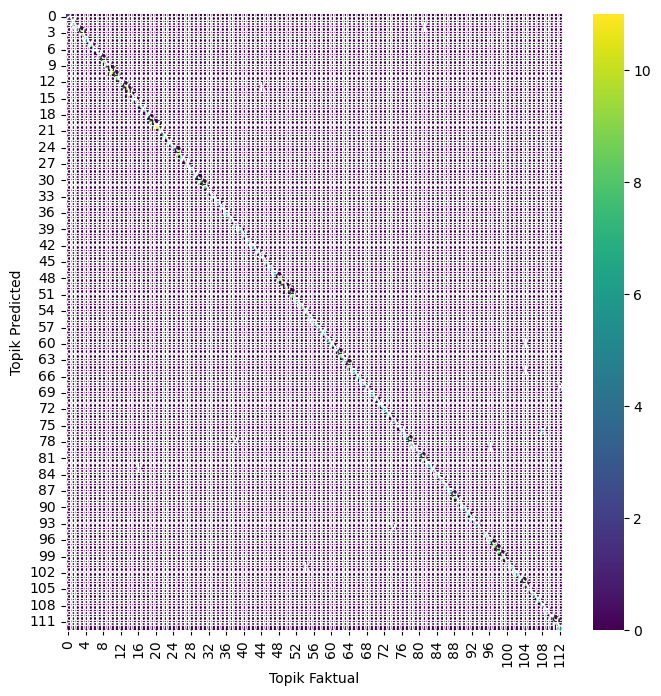

In [51]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), 
annot=True, fmt="d", ax=ax, cmap = 'viridis')
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()

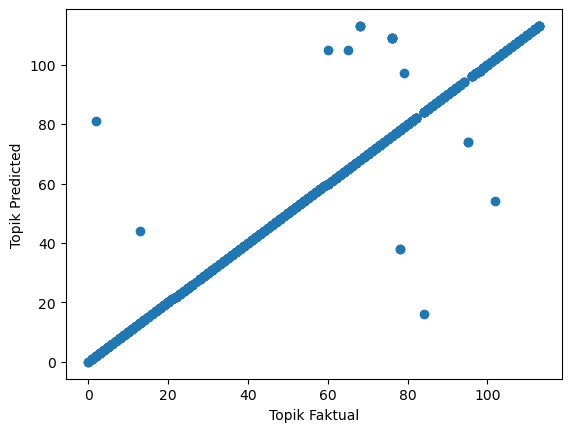

In [53]:
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()

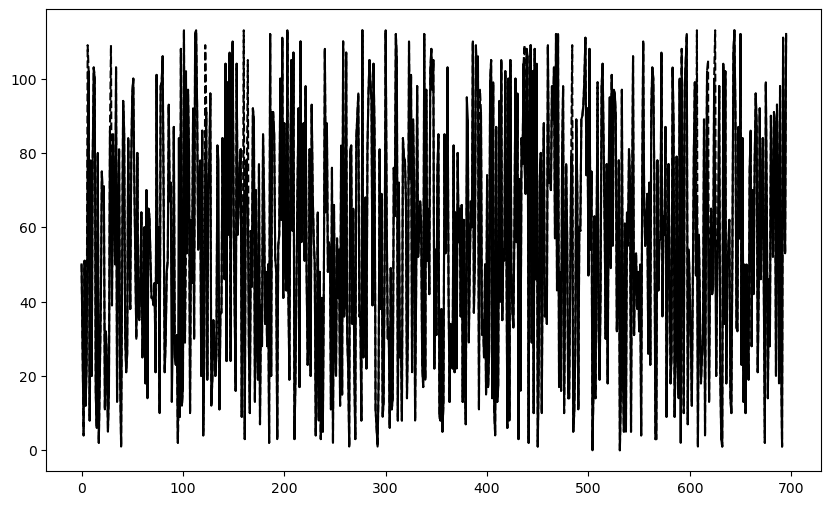

In [56]:
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))

plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, y_pred_dt, label = 'Predicted', color = 'k', linestyle = '--')

In [1]:
!pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------------------------- ------------- 30.7/47.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 465.8 kB/s eta 0:00:00
